<a href="https://colab.research.google.com/github/lblabucsd/Zada_Schulze_24/blob/main/plotting_and_stats_pipeline_isolated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

latest update: MLB. JuL26, 2023

# Prep

In [ ]:
# Mount the Google Drive to the Google Colab notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from google.colab import auth
auth.authenticate_user()

!pip install scikit-posthocs
import math
import time
import os
import sys
import glob
import seaborn as sns
import numpy as np
import scikit_posthocs as sp
import pandas as pd
import scipy
import scipy.stats as stats
from scipy.stats import circmean, circvar, circstd
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

sns.set(font_scale=3)
sns.set_style("white")


Mounted at /content/drive


In [ ]:
# run this to import & update modules when you make changes in the utils.ipynb
%cd '/content/drive/MyDrive/Zada_Schulze_paper/Colab_notebooks_paper'
%run data_processing_utils.ipynb

/content/drive/MyDrive/Zada_Schulze_paper/Colab_notebooks_paper


In [ ]:
# directories for the data and analysis

experiment_class = 'Isolation_Exp'
tab_name = 'Isolation_Exp'

path = '/content/drive/MyDrive/Zada_Schulze_paper/Analysis_output/'+experiment_class+'/'
gsheet = 'https://docs.google.com/spreadsheets/d/1ud4Ifs4Sw3Kth9x_74JBBqgY0MvTXCbLroHDKO8mvQI/edit?usp=sharing'


metadata = read_metadata(gsheet,tab_name)
experiments = metadata.index

figure_savepath = '/content/drive/MyDrive/Zada_Schulze_paper/Figures_output/Behavior_isolated/'

,experiment,exp_type,rig_ver,age,fish_num,fps_Hz,rig_mm,vid_px,trim,wall_pos_px,notes,tracking,habx,video,raw_vid_name,Avg_body_length_mm
0,labels.vDavid_ctrl4.002_070122_4wpf_20minL20mi...,ctrl4,,4wks,3,120,300,1000,,,,,,,,7
1,labels.vDavid_ctrl4.003_011923_dc_mixed_4wks_1...,ctrl4,,4wks,4,120,300,1000,,,,,,,,7
2,labels.vDavid_ctrl4.001_092022_4wpf_Ctrl0_Trim...,ctrl4,,4wks,4,120,300,1000,,,,,,,,7
3,labels.vDavid_ctrl4.000_092022_4wpf_Lightctrl0...,ctrl4,,4wks,4,120,300,1000,,,,,,,,7
4,labels.vDavid_ctrl4.004_070122_4wpf_20minL10mi...,ctrl4,,4wks,4,120,300,1000,,,,,,,,7
5,labels.vDavid_ctrl4.005_070122_4wpf_20minL10mi...,ctrl4,,4wks,4,120,300,1000,,,,,,,,7
6,,,,,,,,,,,,,,,,
7,labels.vDavid_iso4.000_110322_4wpf_dark1iso1_T...,iso4,,4wks,4,120,300,1000,,,,,,,,7
8,labels.vDavid_iso4.001_110322_4wpf_dark1iso1_T...,iso4,,4wks,4,120,300,1000,,,,,,,,7
9,labels.vDavid_iso4.002_110322_4wpf_dark1iso0_T...,iso4,,4wks,4,120,300,1000,,,,,,,,7


# Main workflow

## Level 0

In [ ]:
# info stored in npz

# lev0_basics.npz: 'exp_type', 'fish_num', int, 'scale' (mm/px)
# 'fps' (Hz), 'f_bodylength_mm','f_bodylength_px'
# 'f_nosex','f_nosey','f_x','f_y','f_tailx','f_taily'
# 'f_heading','f_tail_angle','f_speed','f_ang_speed'

# lev0_neighbor_stats.npz
# 'ff_dist','ff_align':,'f_IID','f_IIA'
# 'f_closest','f_closest_dist','f_closest_align'

# lev1_egomaps_full_experiment.npz
#'occupancy_maps','f_alignment_maps'
#'f_speed_maps', 'f_ang_speed_maps'

labels.vDavid_ctrl4.002_070122_4wpf_20minL20minD_ctrl1_10minLTrim.analysis
ctrl4 3 0.3 [5.31081097 5.32353913 5.72347457]


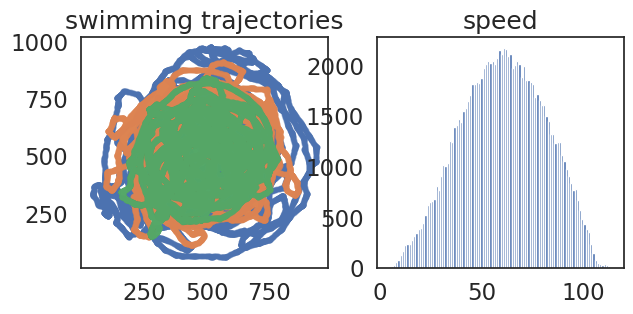

labels.vDavid_ctrl4.003_011923_dc_mixed_4wks_1_Trim.analysis
ctrl4 4 0.3 [4.54866115 4.71555049 4.69376594 4.52338183]


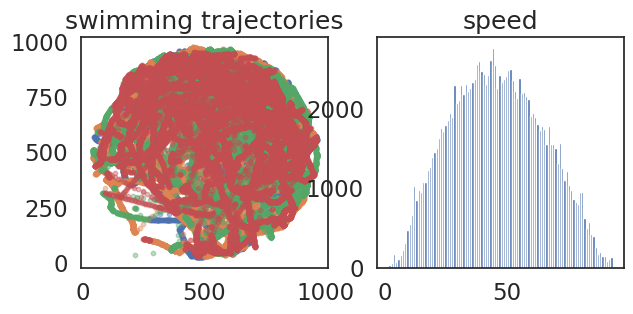

labels.vDavid_ctrl4.001_092022_4wpf_Ctrl0_Trim.analysis
ctrl4 4 0.3 [4.30240503 3.92444737 3.67959424 4.1853772 ]


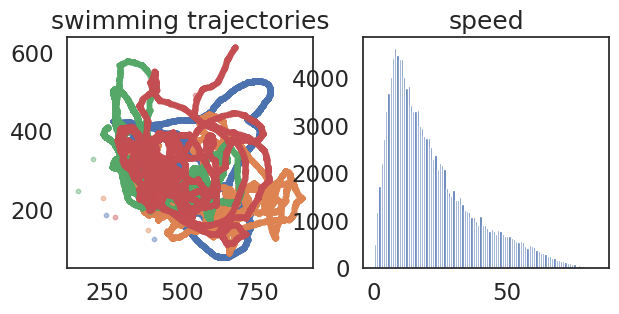

labels.vDavid_ctrl4.000_092022_4wpf_Lightctrl0_Trim.analysis
ctrl4 4 0.3 [4.78878336 4.9274433  4.82631578 5.05162732]


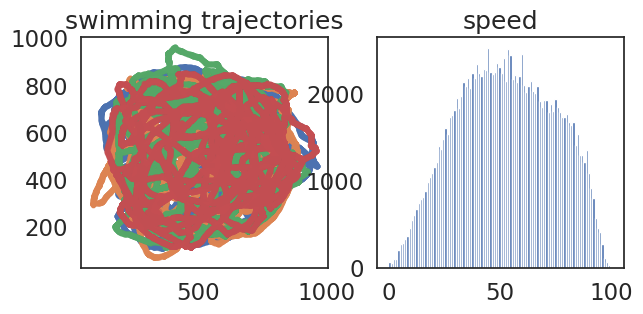

labels.vDavid_ctrl4.004_070122_4wpf_20minL10minD_ctrl0_10minTrim.analysis
ctrl4 4 0.3 [5.27876487 5.05930147 4.84188293 5.23922926]


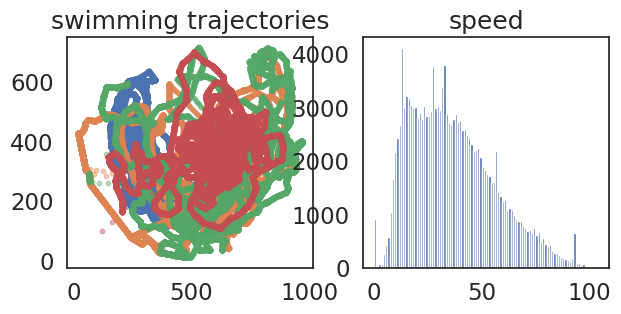

labels.vDavid_ctrl4.005_070122_4wpf_20minL10minD_ctrl0_10minLTrim.analysis
ctrl4 4 0.3 [5.08879262 5.16846167 5.02581214 5.10455154]


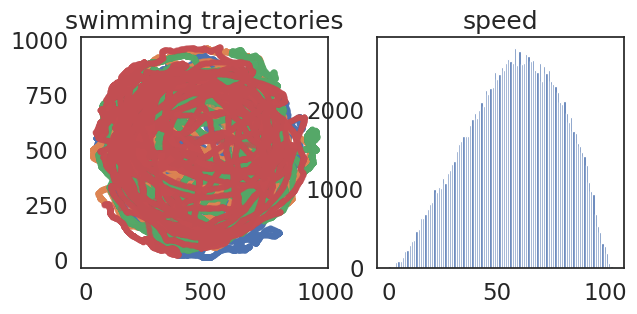

labels.vDavid_iso4.000_110322_4wpf_dark1iso1_Trim2.analysis
iso4 4 0.3 [4.59063652 4.38427116 4.2975319  4.71751105]


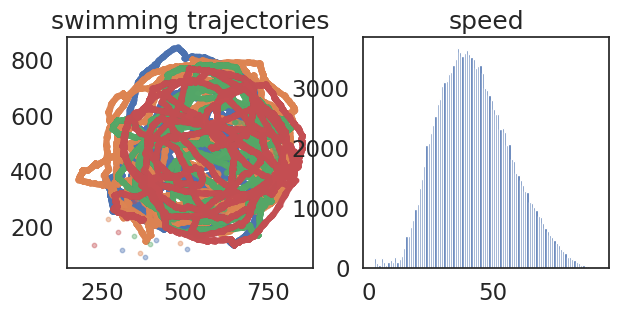

labels.vDavid_iso4.001_110322_4wpf_dark1iso1_Trim.analysis
iso4 4 0.3 [4.52017048 4.70930551 4.21647659 4.45408343]


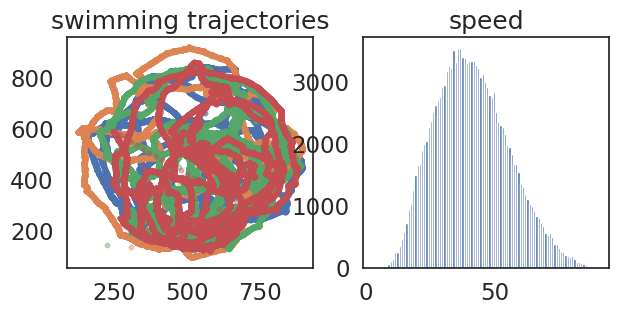

labels.vDavid_iso4.002_110322_4wpf_dark1iso0_Trim2.analysis
iso4 4 0.3 [4.47366782 4.80688937 4.72972208 4.68400493]


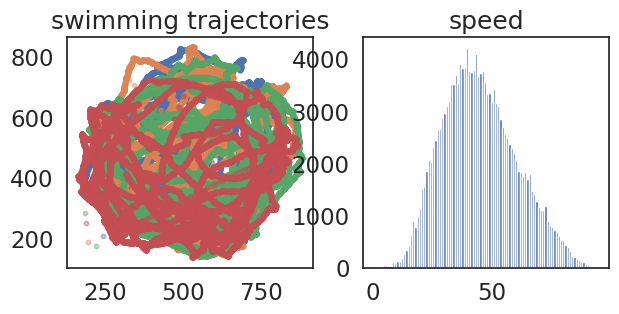

labels.vDavid_iso4.003_110322_4wpf_dark1iso0_Trim.analysis
iso4 4 0.3 [4.16749984 4.32827008 4.39730955 4.23617389]


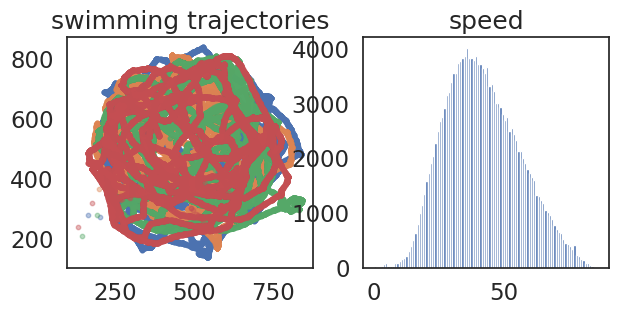

labels.vDavid_iso4.004_092022_4wpf_plate5iso0_Trim2.analysis
iso4 4 0.3 [5.54763486 4.91404601 4.82126318 4.82420471]


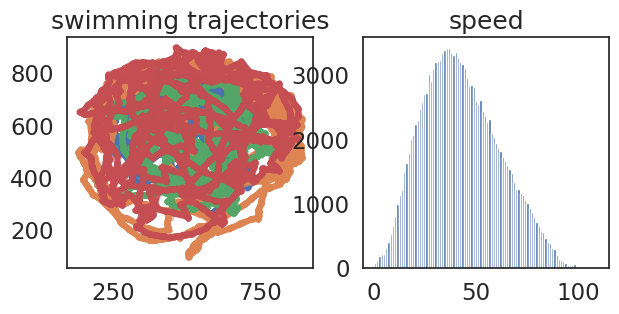

labels.vDavid_iso4.005_092022_4wpf_plate5iso0_Trim.analysis
iso4 4 0.3 [4.86736906 4.7904685  4.80683951 5.49145012]


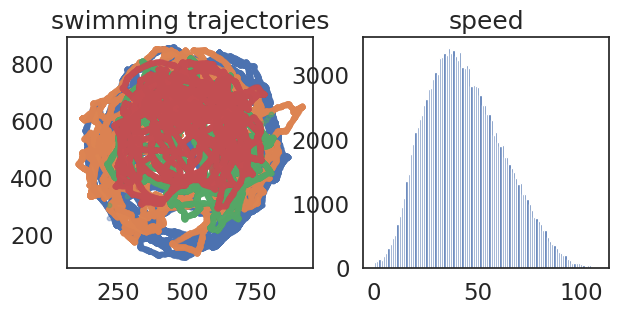

labels.vDavid_iso4.006_092022_4wpf_dark1iso3_Trim2.analysis
iso4 4 0.3 [5.16065352 5.26373312 4.91244655 5.16480594]


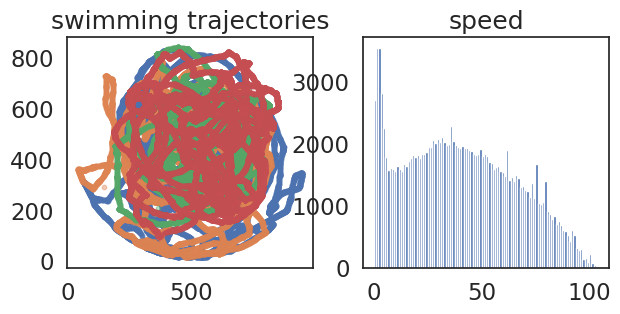

labels.vDavid_iso4.007_092022_4wpf_dark1iso3_Trim.analysis
iso4 4 0.3 [4.8141096  5.20091844 5.31408285 5.17859626]


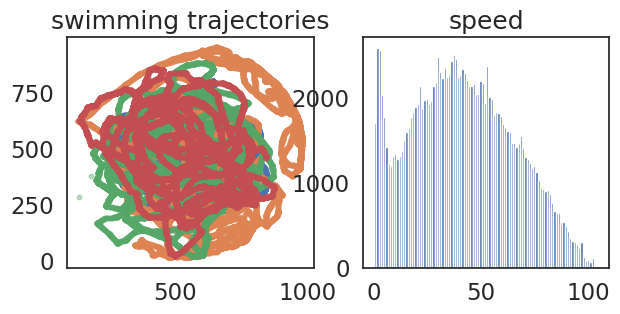

labels.vDavid_iso4.008_092022_4wpf_dark1iso0_Trim2.analysis
iso4 4 0.3 [4.763819   5.21347614 4.91894969 5.07036117]


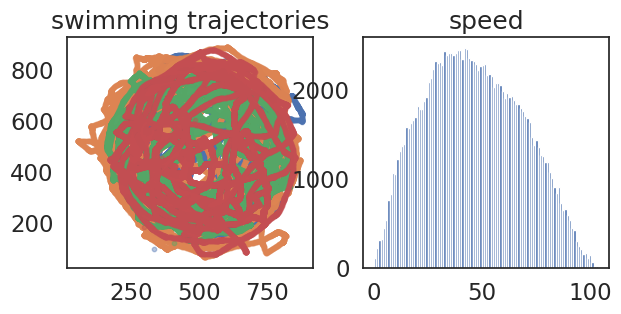

labels.vDavid_iso4.010_082222_4wpf_5iso3_Trim.analysis
iso4 3 0.3 [4.66548261 4.91299132 5.06122647]


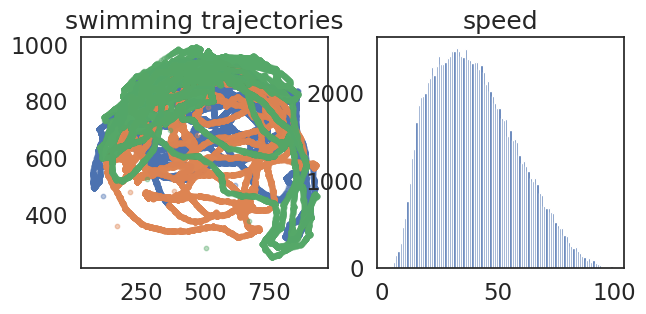

labels.vDavid_iso4.011_070822_4wpf_5iso0_10minTrim2.analysis
iso4 4 0.3 [5.09784333 4.93728861 5.03349274 5.08469423]


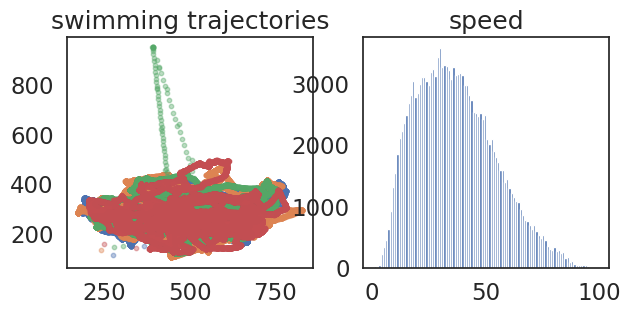

labels.vDavid_iso4.012_070822_4wpf_5iso1_10minTrim.analysis
iso4 4 0.3 [5.0175797  4.5816333  5.07502063 4.85913316]


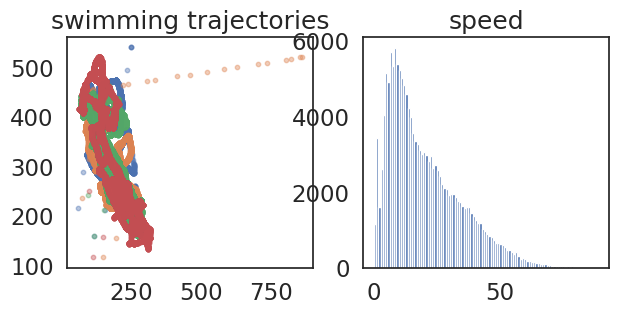

labels.vDavid_ctrl_iso6.000_020223_6wpf_ctrl_0_Trim.analysis
ctrl6 4 0.3 [5.5011363  5.49356617 5.54383022 5.53482238]


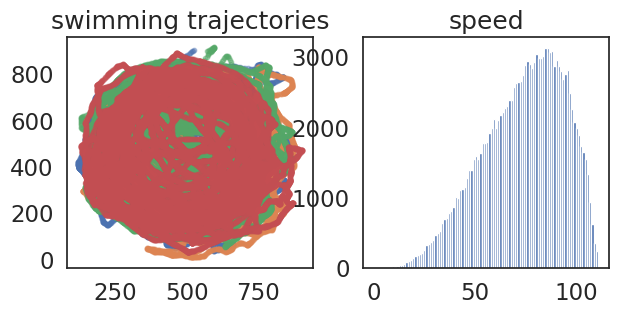

labels.vDavid_ctrl_iso6.001_020223_6wpf_ctrl_1_Trim.analysis
ctrl6 4 0.3 [5.282802   5.19686348 5.3213873  5.31040978]


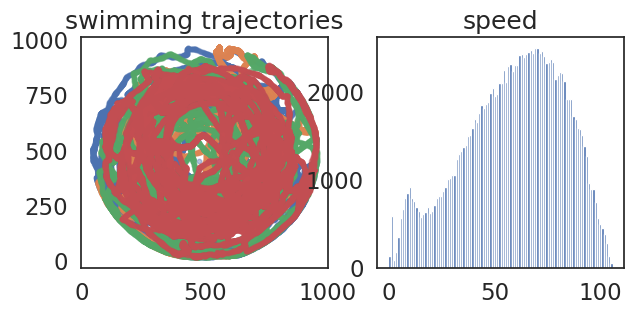

labels.vDavid_ctrl_iso6.012_061622_6wpf_ctrl0_10minTrim2.analysis
ctrl6 4 0.3 [4.37390794 4.65678365 4.67253746 4.69252234]


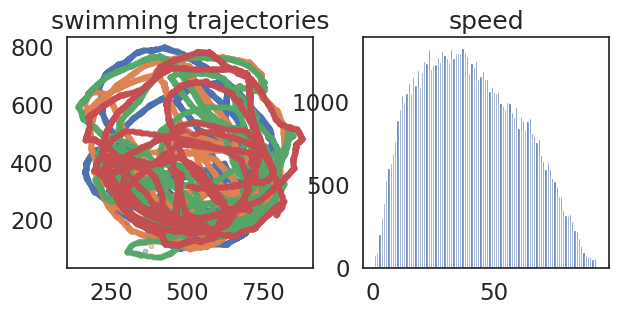

labels.vDavid_ctrl_iso6.013_061622_6wpf_ctrl0_10minTrim.analysis
ctrl6 4 0.3 [5.34059219 5.12626787 5.33981423 5.15153414]


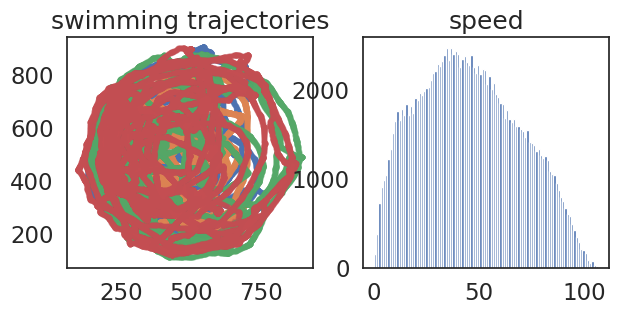

labels.vDavid_ctrl_iso6.016_061622_6wpf_ctrl1_10minTrim.analysis
ctrl6 4 0.3 [5.24641966 5.58942683 5.52467704 5.63510822]


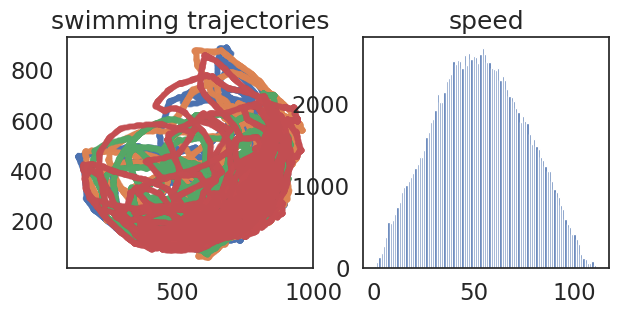

labels.vDavid_ctrl_iso6.017_061622_6wpf_ctrl2_10minTrim.analysis
ctrl6 4 0.3 [5.15817204 5.27457949 5.24606899 5.35750414]


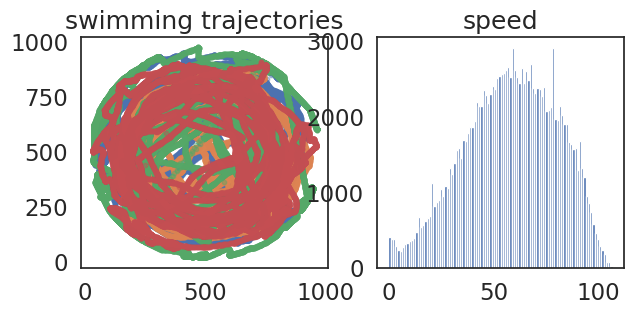

labels.vDavid_ctrl_iso6.002_020223_6wpf_iso_1_Trim.analysis
iso6 4 0.3 [5.74179455 5.70480688 5.7291268  5.50719009]


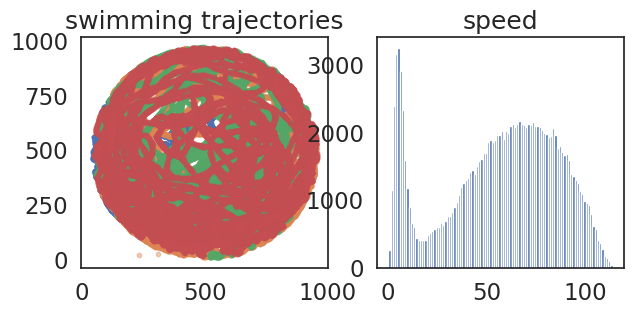

labels.vDavid_ctrl_iso6.003_020223_6wpf_iso_2_Trim.analysis
iso6 4 0.3 [5.72448132 5.7599643  5.7293652  5.55693516]


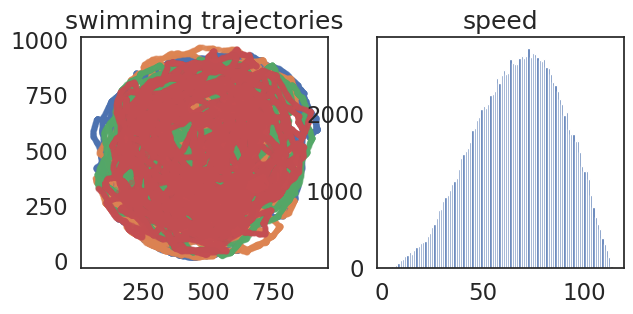

labels.vDavid_ctrl_iso6.004_020223_6wpf_iso_3_Trim.analysis
iso6 4 0.3 [5.48804612 5.83339623 6.13584316 5.60998404]


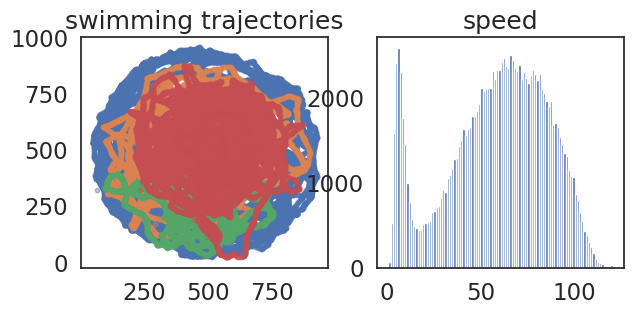

labels.vDavid_ctrl_iso6.006_111822_6wpf_dark1iso1_Trim.analysis
iso6 4 0.3 [5.30608402 5.2440453  5.4507352  5.2607075 ]


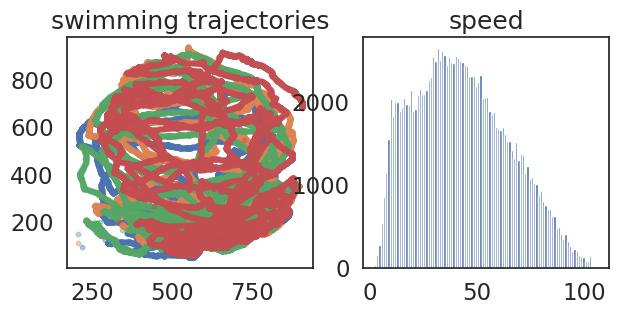

labels.vDavid_ctrl_iso6.007_111822_6wpf_dark1iso0_Trim2.analysis
iso6 4 0.3 [5.36322845 5.30056692 5.33144891 5.24052708]


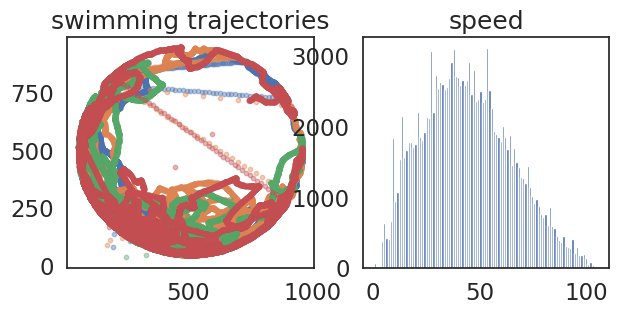

labels.vDavid_ctrl_iso6.008_111822_6wpf_dark1iso0_Trim.analysis
iso6 4 0.3 [5.23404444 5.35799479 5.37651337 5.0317163 ]


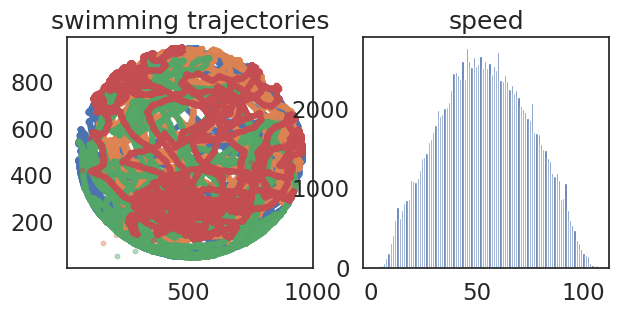

labels.vDavid_ctrl_iso6.009_100322_6wpf_plate1iso2_Trim2.analysis
iso6 4 0.3 [5.97194482 5.59692238 5.77584652 5.56461895]


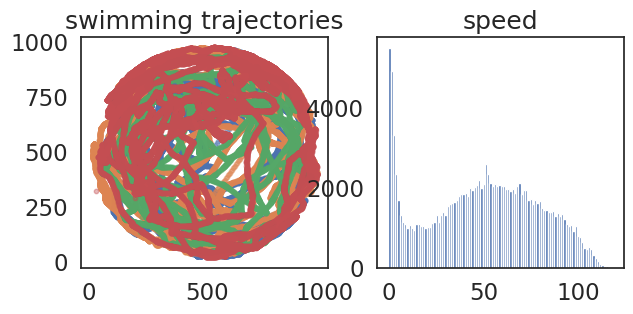

labels.vDavid_ctrl_iso6.010_100322_6wpf_plate1iso2_Trim.analysis
iso6 4 0.3 [5.5475207  5.58742149 6.11434606 5.54853745]


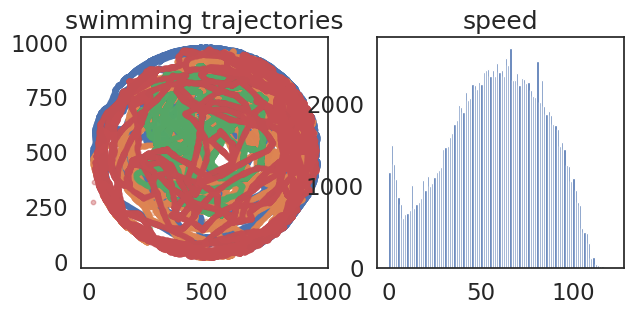

labels.vDavid_ctrl_iso6.011_100322_6wpf_dark1iso1_Trim2.analysis
iso6 4 0.3 [5.78581645 5.75892544 5.79647401 5.62191594]


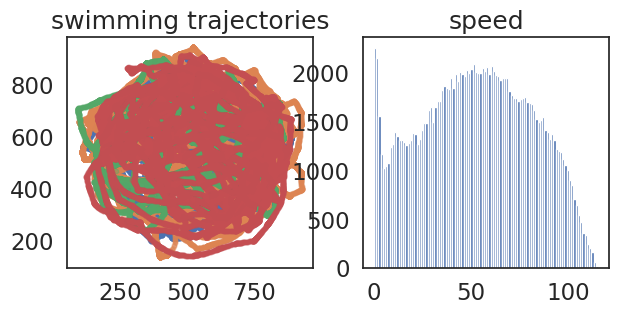

labels.vDavid_ctrl_iso6.014_061622_6wpf_5iso1_10minTrim.analysis
iso6 4 0.3 [4.89574839 5.24265425 5.46183219 5.27303876]


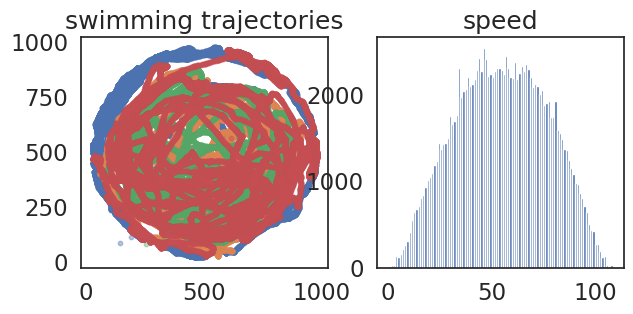

labels.vDavid_ctrl_iso6.015_061622_6wpf_5iso0_10minTrim.analysis
iso6 4 0.3 [5.39481623 5.48812152 5.42476253 5.58691261]


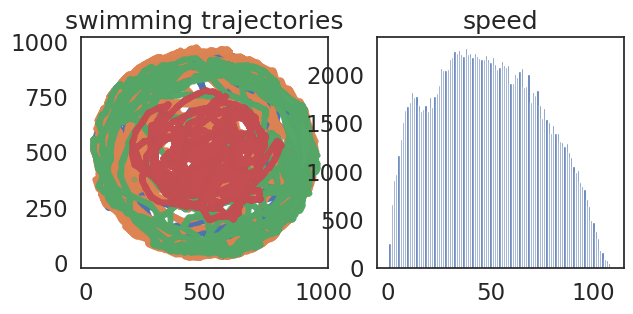

labels.vDavid_ctrl_iso6.018_072222_6wpf_5iso1_Trim1.analysis
iso6 4 0.3 [5.7378997  5.68588797 5.77065302 5.71381985]


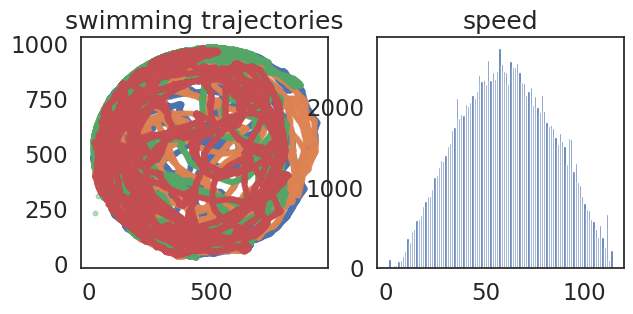

labels.vDavid_ctrl_iso6.019_100322_6wpf_dark1iso0_Trim.analysis
iso6 4 0.3 [5.63163063 5.56442507 5.62938912 5.57947852]


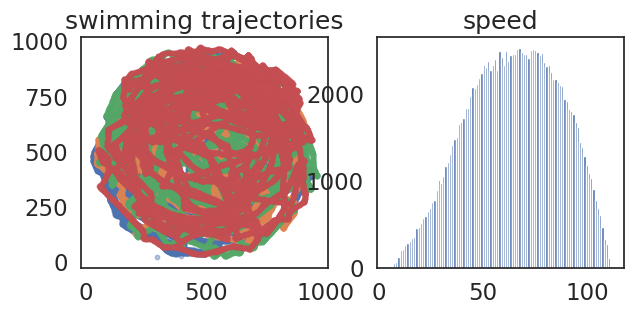

In [ ]:
# from traitlets.config.configurable import SingletonConfigurable
# loop through all experiment in the log

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    print(str(exp))

    # access analysis folder with npz and get the info
    folder = path + exp + '/'

    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    print(exp_type, fish_num, scale, bodylength)

    plt.figure(figsize=[7,3])
    plt.subplot(121)
    for f in range(fish_num):
      plt.scatter(f_x[f],f_y[f],alpha=0.4, s=10)
    plt.title('swimming trajectories')

    plt.subplot(122)
    tmp=[]
    for f in range(fish_num):
      [tmp.append(x) for x in f_speed[f]]
    plt.hist(tmp, bins=100)
    plt.title('speed')

    plt.show()



#descriptive stats to compare across ages (1-way ANOVAs w/ pairwise posthoc comparison). (on a per-fish or group basis)

fract time mov


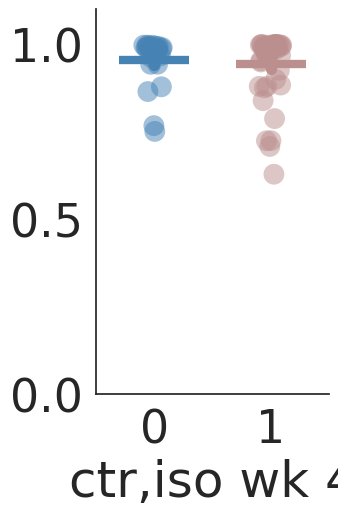

4 week u-statistic:  506.0 P-value:  0.6707377950737392
4 week group #, N, MEANS, and SEM
0 23 0.9541366868423573 0.014821713537988028
normality test is ShapiroResult(statistic=0.6362565755844116, pvalue=2.3141972178564174e-06)
1 47 0.9430581658151939 0.013237817589823701
normality test is ShapiroResult(statistic=0.6620281934738159, pvalue=3.8694829562757604e-09)
fract time mov


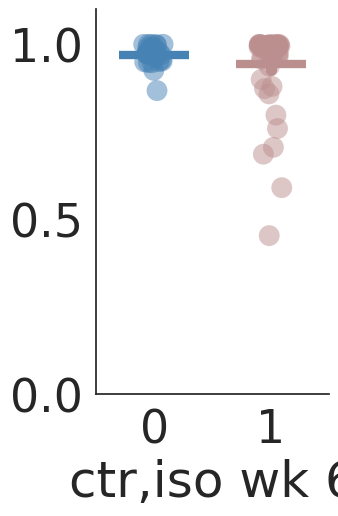

6 week u-statistic:  549.0 P-value:  0.4051159644894631
6 week group #, N, MEANS, and SEM
0 24 0.9692862341424893 0.006179229421409742
normality test is ShapiroResult(statistic=0.8401409387588501, pvalue=0.001442276407033205)
1 52 0.9429001213451605 0.015726523021333007
normality test is ShapiroResult(statistic=0.557482123374939, pvalue=2.787756657463003e-11)


In [ ]:
#PLOT fraction time moving (more than 2.0 body lengths/s), and video recording time
thresh=2.0

ctrl4=[]; iso4=[]; ctrl6=[]; iso6=[];
summary_data = [ctrl4,iso4,ctrl6,iso6]
conditions = ['ctrl4','iso4','ctrl6','iso6']


for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        for i,j in zip(f_speed,bodylength):
          s.append(sum([1 for d in i if d/j > thresh])/len(i))

plt.figure(figsize=[3,5])
sns.pointplot(data=summary_data[:2], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette=['steelblue', 'rosybrown'], linestyle='none')
sns.stripplot(data=summary_data[:2], s=15, palette=['steelblue', 'rosybrown'], jitter=True, alpha=0.5)
plt.xlabel('ctr,iso wk 4')
print('fract time mov')
plt.ylim(0,1.1)
sns.despine()
plt.savefig(figure_savepath +"wk4_fracttimemov.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

# ttests test
t_statistic, p_value = stats.mannwhitneyu(ctrl4,iso4)
print("4 week u-statistic: ", t_statistic, "P-value: ", p_value)

print("4 week group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data[:2]):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
  print('normality test is', scipy.stats.shapiro(i))



plt.figure(figsize=[3,5])
sns.pointplot(data=summary_data[2:], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette=['steelblue', 'rosybrown'], linestyle='none')
sns.stripplot(data=summary_data[2:], s=15, palette=['steelblue', 'rosybrown'], jitter=True, alpha=0.5)
plt.xlabel('ctr,iso wk 6')
print('fract time mov')
sns.despine()
plt.ylim(0,1.1)
plt.savefig(figure_savepath +"wk6_fracttimemov.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

t_statistic, p_value = stats.mannwhitneyu(ctrl6,iso6)
print("6 week u-statistic: ", t_statistic, "P-value: ", p_value)

print("6 week group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data[2:]):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
  print('normality test is', scipy.stats.shapiro(i))

group area (mm2)


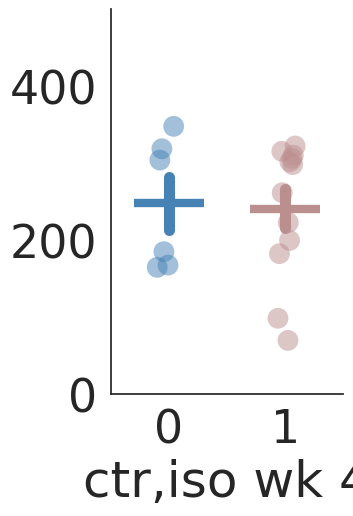

4 week u-statistic:  38.0 P-value:  0.8916181857358327
4 week group #, N, MEANS, and SEM
0 6 248.0983692732345 34.37907740543094
normality test is ShapiroResult(statistic=0.8212198615074158, pvalue=0.0904214009642601)
1 12 240.84807949977392 25.17068213611222
normality test is ShapiroResult(statistic=0.8437107801437378, pvalue=0.03072783164680004)
group area (mm2)


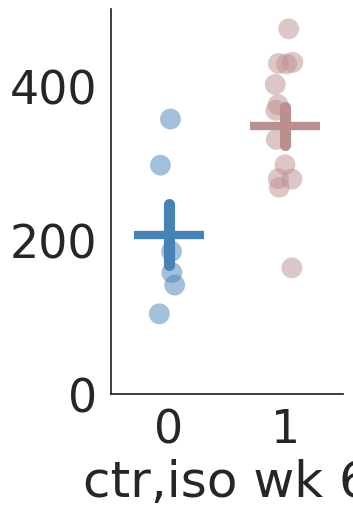

6 week u-statistic:  11.0 P-value:  0.012457614624797286
6 week group #, N, MEANS, and SEM
0 6 207.44903482468317 40.179863942373125
normality test is ShapiroResult(statistic=0.8999587893486023, pvalue=0.3736865222454071)
1 13 348.6669208691695 24.348770514917923
normality test is ShapiroResult(statistic=0.9463526606559753, pvalue=0.5441890358924866)


In [ ]:
#PLOT Group area
ctrl4=[]; iso4=[]; ctrl6=[]; iso6=[];
summary_data = [ctrl4,iso4,ctrl6,iso6]
conditions = ['ctrl4','iso4','ctrl6','iso6']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    group_area = data['group_area']*scale

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(np.mean(group_area))

plt.figure(figsize=[3,5])
sns.pointplot(data=summary_data[:2], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette=['steelblue', 'rosybrown'], linestyle='none')
sns.stripplot(data=summary_data[:2], s=15, palette=['steelblue', 'rosybrown'], jitter=True, alpha=0.5)
plt.xlabel('ctr,iso wk 4')
print('group area (mm2)')
plt.ylim(0,500)
sns.despine()
plt.savefig(figure_savepath +"wk4_grouparea.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

# ttests test
t_statistic, p_value = stats.mannwhitneyu(ctrl4,iso4)
print("4 week u-statistic: ", t_statistic, "P-value: ", p_value)

print("4 week group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data[:2]):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
  print('normality test is', scipy.stats.shapiro(i))



plt.figure(figsize=[3,5])
sns.pointplot(data=summary_data[2:], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette=['steelblue', 'rosybrown'], linestyle='none')
sns.stripplot(data=summary_data[2:], s=15, palette=['steelblue', 'rosybrown'], jitter=True, alpha=0.5)
plt.xlabel('ctr,iso wk 6')
print('group area (mm2)')
plt.ylim(0,500)
sns.despine()
plt.savefig(figure_savepath +"wk6_grouparea.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

t_statistic, p_value = stats.mannwhitneyu(ctrl6,iso6)
print("6 week u-statistic: ", t_statistic, "P-value: ", p_value)

print("6 week group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data[2:]):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
  print('normality test is', scipy.stats.shapiro(i))

speed mm/s


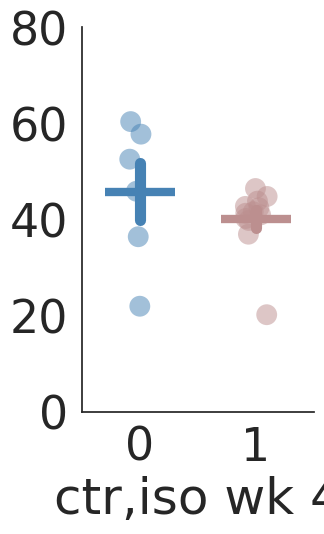

4 week u-statistic:  49.0 P-value:  0.24962292609351436
4 week group #, N, MEANS, and SEM
0 6 45.866244195930484 5.929551800330626
normality test is ShapiroResult(statistic=0.9252411127090454, pvalue=0.5438842177391052)
1 12 40.15628719663135 1.942709446616856
normality test is ShapiroResult(statistic=0.6834763884544373, pvalue=0.0005868414300493896)
speed mm/s


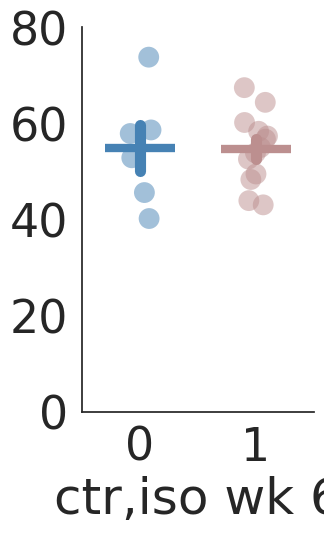

6 week u-statistic:  39.0 P-value:  1.0
6 week group #, N, MEANS, and SEM
0 6 54.858807341328436 4.775005199129904
normality test is ShapiroResult(statistic=0.9622877836227417, pvalue=0.8371877670288086)
1 13 54.692670567609056 2.0157796521937668
normality test is ShapiroResult(statistic=0.9776462912559509, pvalue=0.966072142124176)


In [ ]:
#PLOT SPEED (raw and by bodylength)
ctrl4=[]; iso4=[]; ctrl6=[]; iso6=[];
summary_data = [ctrl4,iso4,ctrl6,iso6]
conditions = ['ctrl4','iso4','ctrl6','iso6']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(np.mean([np.mean(i) for i in f_speed]))


plt.figure(figsize=[3,5])
sns.pointplot(data=summary_data[:2], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette=['steelblue', 'rosybrown'], linestyle='none')
sns.stripplot(data=summary_data[:2], s=15, palette=['steelblue', 'rosybrown'], jitter=True, alpha=0.5)
plt.xlabel('ctr,iso wk 4')
print('speed mm/s')
plt.ylim(0,80)
sns.despine()
plt.savefig(figure_savepath +"wk4_speed.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

# ttests test
t_statistic, p_value = stats.mannwhitneyu(ctrl4,iso4)
print("4 week u-statistic: ", t_statistic, "P-value: ", p_value)

print("4 week group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data[:2]):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
  print('normality test is', scipy.stats.shapiro(i))



plt.figure(figsize=[3,5])
sns.pointplot(data=summary_data[2:], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette=['steelblue', 'rosybrown'], linestyle='none')
sns.stripplot(data=summary_data[2:], s=15, palette=['steelblue', 'rosybrown'], jitter=True, alpha=0.5)
plt.xlabel('ctr,iso wk 6')
print('speed mm/s')
plt.ylim(0,80)
sns.despine()
plt.savefig(figure_savepath +"wk6_speed.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

t_statistic, p_value = stats.mannwhitneyu(ctrl6,iso6)
print("6 week u-statistic: ", t_statistic, "P-value: ", p_value)

print("6 week group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data[2:]):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
  print('normality test is', scipy.stats.shapiro(i))

heading corr r


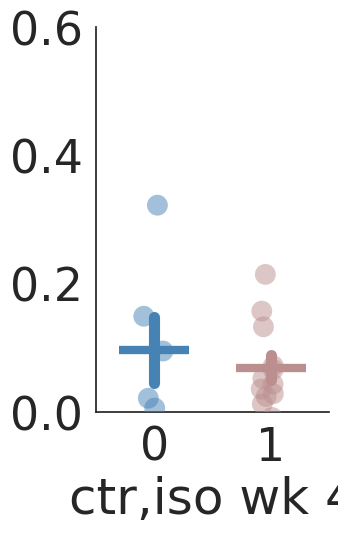

4 week u-statistic:  34.0 P-value:  0.8916181857358327
4 week group #, N, MEANS, and SEM
0 6 0.09666891920662914 0.05174424928359215
normality test is ShapiroResult(statistic=0.8708939552307129, pvalue=0.2297917902469635)
1 12 0.0696325939908282 0.019043371919305826
normality test is ShapiroResult(statistic=0.8823023438453674, pvalue=0.0938112884759903)
heading corr r


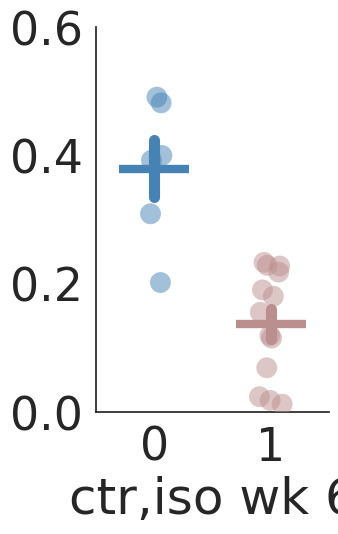

6 week u-statistic:  74.0 P-value:  0.0008845643520566121
6 week group #, N, MEANS, and SEM
0 6 0.3795974054216569 0.04470631124865061
normality test is ShapiroResult(statistic=0.92048180103302, pvalue=0.5088378190994263)
1 13 0.13814292574214485 0.02339085508063811
normality test is ShapiroResult(statistic=0.8824520111083984, pvalue=0.07698328793048859)


In [ ]:
#PLOT angle correlations (one average value across the group)
ctrl4=[]; iso4=[]; ctrl6=[]; iso6=[];
summary_data = [ctrl4,iso4,ctrl6,iso6]
conditions = ['ctrl4','iso4','ctrl6','iso6']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        data = np.vstack(f_heading)
        corr_matrix = np.corrcoef(data)
        off_diagonal_elements = corr_matrix[np.triu_indices_from(corr_matrix, k=1)]
        s.append(np.mean(off_diagonal_elements))


plt.figure(figsize=[3,5])
sns.pointplot(data=summary_data[:2], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette=['steelblue', 'rosybrown'], linestyle='none')
sns.stripplot(data=summary_data[:2], s=15, palette=['steelblue', 'rosybrown'], jitter=True, alpha=0.5)
plt.xlabel('ctr,iso wk 4')
print('heading corr r')
plt.ylim(0,0.6)
sns.despine()
plt.savefig(figure_savepath +"wk4_headingcorr.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

# ttests test
t_statistic, p_value = stats.mannwhitneyu(ctrl4,iso4)
print("4 week u-statistic: ", t_statistic, "P-value: ", p_value)

print("4 week group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data[:2]):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
  print('normality test is', scipy.stats.shapiro(i))



plt.figure(figsize=[3,5])
sns.pointplot(data=summary_data[2:], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette=['steelblue', 'rosybrown'], linestyle='none')
sns.stripplot(data=summary_data[2:], s=15, palette=['steelblue', 'rosybrown'], jitter=True, alpha=0.5)
plt.xlabel('ctr,iso wk 6')
print('heading corr r')
plt.ylim(0,0.6)
sns.despine()
plt.savefig(figure_savepath +"wk6_headingcorr.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

t_statistic, p_value = stats.mannwhitneyu(ctrl6,iso6)
print("6 week u-statistic: ", t_statistic, "P-value: ", p_value)

print("6 week group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data[2:]):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
  print('normality test is', scipy.stats.shapiro(i))